# <center>A Data-driven Look at the Pandemic's Effect on Industries and Economic Sectors<center>

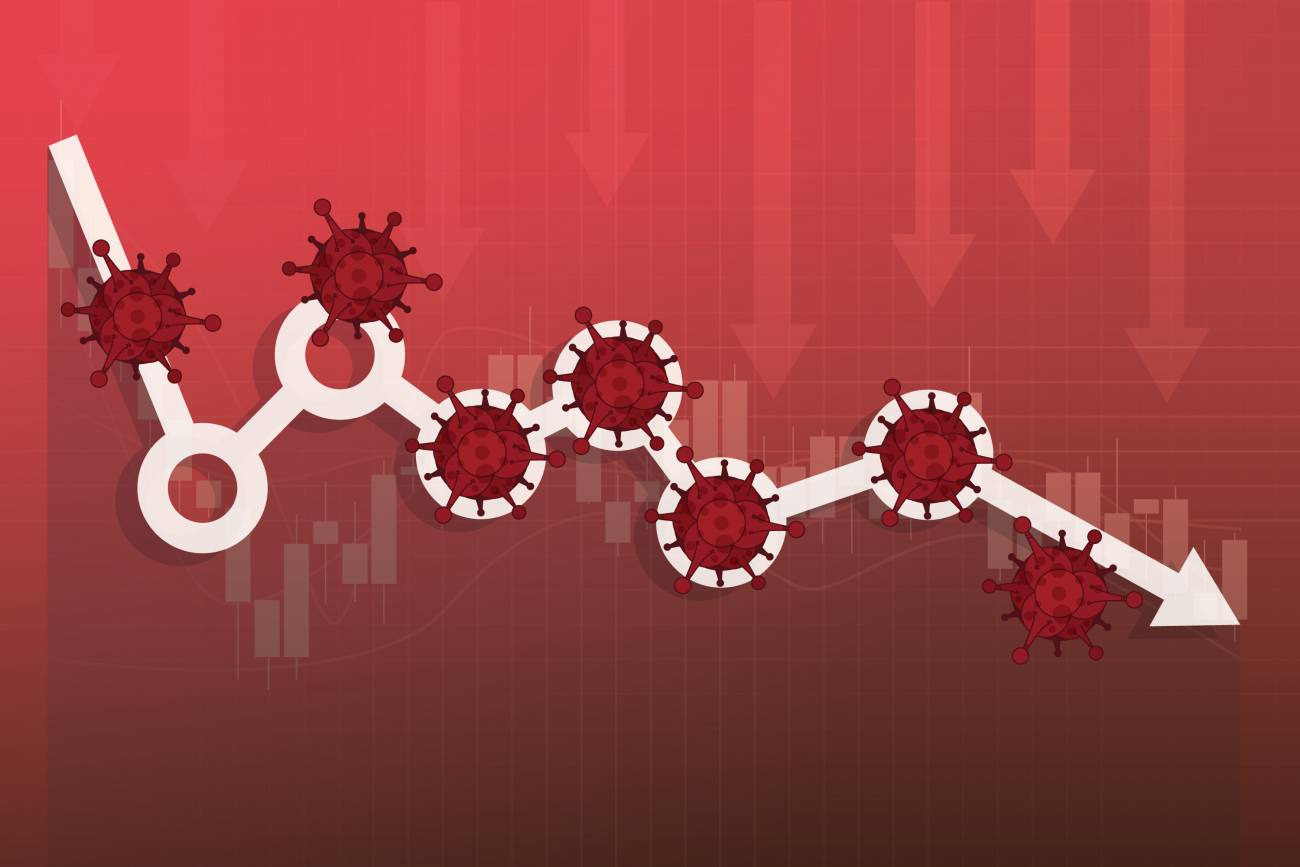

## Context

In late 2019, the world was confronted with a global health crisis that would reshape economies, societies, and industries. The COVID-19 pandemic unleashed unprecedented challenges and uncertainties, forcing businesses to adapt rapidly to the changing landscape. In this analysis, I conducted a data-driven research of how the pandemic impacted various industries worldwide. By examining key metrics and trends, I aimed to gain a comprehensive understanding of the pandemic's far-reaching effects on sectors such as healthcare, retail, technology, oil & gas, and more.

<b><i>The conclusions of this study can be found at the end of this notebook.</b></i>

## About data

For my research, I used the first dataset from the list, while the next three datasets were used to fill in missing values (of which there were quite a few).

https://www.kaggle.com/datasets/takahirokubo0/annual-financial-data-for-hybrid-cdp-kpi

https://www.nasdaq.com/market-activity/stocks/screener - csv ticker symbols

https://eoddata.com/stocklist/NYSE/A.htm - tickers list
</br>
</br>

## Preprocessing

### Data quality assessment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\Asus\Desktop\dis\2_p_KPIs_sau-industry_merge industry\cdp_financial_data.csv")

In [3]:
data.head(3)

,Ticker,Report Date,Currency,Fiscal Year,Fiscal Period,Revenue,Cost of Revenue,Operating Income (Loss),Operating Expenses,Depreciation & Amortization,...,country,region,authority_types,activities,sectors,industries,primary_activity,primary_sector,primary_industry,primary_questionnaire_sector
0,A,2017-10-31,USD,2017,FY,4.472000e+09,-2.063000e+09,841000000.0,-1.568000e+09,212000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,2018-10-31,USD,2018,FY,4.914000e+09,-2.227000e+09,928000000.0,-1.759000e+09,210000000.0,...,United States of America,NaN,"Investor, Supply Chain",Medical equipment,Medical equipment & supplies,"Biotech, health care & pharma",Medical equipment,Medical equipment & supplies,"Biotech, health care & pharma",General
2,A,2019-10-31,USD,2019,FY,5.163000e+09,-2.358000e+09,941000000.0,-1.864000e+09,238000000.0,...,United States of America,NaN,"Investor, Supply Chain",Medical equipment,Medical equipment & supplies,"Biotech, health care & pharma",Medical equipment,Medical equipment & supplies,"Biotech, health care & pharma",General


In [4]:
data.columns

Index(['Ticker', 'Report Date', 'Currency', 'Fiscal Year', 'Fiscal Period',
       'Revenue', 'Cost of Revenue', 'Operating Income (Loss)',
       'Operating Expenses', 'Depreciation & Amortization', 'EBITDA',
       'country_code', 'primary_ticker', 'account_number', 'organization',
       'survey_year', 'response_received_date', 'country', 'region',
       'authority_types', 'activities', 'sectors', 'industries',
       'primary_activity', 'primary_sector', 'primary_industry',
       'primary_questionnaire_sector'],
      dtype='object')

In [5]:
data.shape

(5633, 27)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5633 entries, 0 to 5632
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker                        5633 non-null   object 
 1   Report Date                   5633 non-null   object 
 2   Currency                      5633 non-null   object 
 3   Fiscal Year                   5633 non-null   int64  
 4   Fiscal Period                 5633 non-null   object 
 5   Revenue                       5497 non-null   float64
 6   Cost of Revenue               5022 non-null   float64
 7   Operating Income (Loss)       5631 non-null   float64
 8   Operating Expenses            5611 non-null   float64
 9   Depreciation & Amortization   5495 non-null   float64
 10  EBITDA                        5633 non-null   float64
 11  country_code                  699 non-null    object 
 12  primary_ticker                699 non-null    object 
 13  acc

#### Visualizing missing values

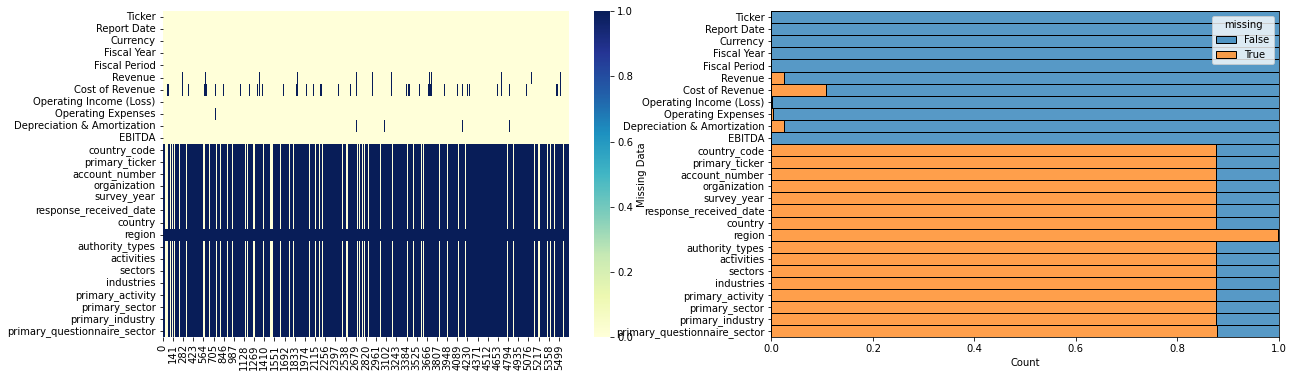

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

a = sns.heatmap(data.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'}, ax=axs[0])
b = sns.histplot(data=data.isna().melt(value_name="missing"), y="variable", hue="missing",
                multiple="fill", ax=axs[1])

plt.show()

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,5633.0,2.018045e+03,8.856711e-01,2.017000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03
Revenue,5497.0,7.458769e+09,2.495821e+10,-3.902910e+05,2.823480e+08,1.386520e+09,5.223203e+09,5.239640e+11
Cost of Revenue,5022.0,-5.192828e+09,1.932465e+10,-3.946050e+11,-3.039946e+09,-7.915590e+08,-1.441548e+08,7.202000e+09
Operating Income (Loss),5631.0,9.025530e+08,3.403773e+09,-8.596000e+09,-4.141900e+04,1.107750e+08,6.110055e+08,7.089800e+10
Operating Expenses,5611.0,-1.755559e+09,5.397317e+09,-1.087910e+11,-1.285561e+09,-3.936930e+08,-1.024685e+08,-8.797000e+03
Depreciation & Amortization,5495.0,4.376570e+08,1.547125e+09,-6.160000e+07,9.235000e+06,6.321500e+07,2.599290e+08,2.921800e+10
EBITDA,5633.0,1.329168e+09,4.590594e+09,-8.124000e+09,6.935884e+06,1.850560e+08,9.112000e+08,8.180100e+10
account_number,699.0,1.748946e+04,3.430537e+04,5.800000e+01,4.620000e+03,1.302400e+04,2.091700e+04,8.332910e+05
survey_year,699.0,2.018628e+03,6.094885e-01,2.018000e+03,2.018000e+03,2.019000e+03,2.019000e+03,2.020000e+03


### Data integration - dealing with missing values

**Saving 4934 instances.**
</br>
As can be seen from the above plot, the dataset has many missing values.Therefore, in order to save those instances with missing values, I used two other datasets from which I extracted those values.

In [9]:
new = pd.read_csv(r"C:\Users\Asus\Desktop\dis\2_p_KPIs_sau-industry_merge industry\nasdaq_screener.csv")

data['organization'] = data['organization'].apply(lambda x: np.nan)
data['organization'] = data['organization'].fillna(data['Ticker'])

new['Name'] = new['Name'] + "|" + new['Sector'] + "|" + new['Industry']

mydict = dict(zip(new['Symbol'].tolist(), new['Name'].tolist()))

def replace(item):
    if item in mydict.keys():
        new_item = mydict[item]
        return new_item
    else:
        return item

data['organization'] = data['organization'].apply(replace)
data['organization'] = data['organization'].apply(str)

my_org = []
my_sector = []
my_industry = []
for item in data['organization'].tolist():
    if "|" in item:
        my_org.append(item.split("|")[0])
        my_sector.append(item.split("|")[1])
        my_industry.append(item.split("|")[2])
    else:
        my_org.append(item)
        my_sector.append(item)
        my_industry.append(item)
        
data['organization'] = my_org
data['primary_sector'] = my_sector
data['primary_industry'] = my_industry

data['organization'] = np.where(data['organization'] == 'nan', data['Ticker'], data['organization'])
data['primary_sector'] = np.where(data['primary_sector'] == 'nan', data['Ticker'], data['primary_sector'])
data['primary_industry'] = np.where(data['primary_industry'] == 'nan', data['Ticker'], data['primary_industry'])

### Data transformation

#### Sorting by time

In [10]:
data.sort_values('Report Date', ascending = True, inplace = True)

#### From object to datetime

In [11]:
data["Report Date"] = data["Report Date"].astype("datetime64")

In [12]:
data.reset_index(inplace = True)
del data['index']

#### Attribute selection

In [13]:
"""keeping just the most important KPIs"""

data = data[['Ticker', 'organization', 'primary_sector', 'primary_industry', 'Fiscal Year', 'Revenue', 
               'Operating Income (Loss)', 'EBITDA', 'Operating Expenses']]

#### Data formatting

In [14]:
"""for better visualization of numeric data"""
pd.options.display.float_format = '{:,.0f}'.format

## Data exploration

#### Correlation between KPIs

In order to better understand the data, I first check the correlation between KPIs.

* **Revenue**: Total income from sales, showing how much money the company makes.

* **Operating Income (Loss)**: Profit or loss from core business operations, indicating how well the company performs its primary activities.

* **EBITDA** (Earnings Before Interest, Taxes, Depreciation & Amortization): Operating profit before certain expenses, giving a clearer picture of the company's operational performance.

* **Operating Expenses**: Day-to-day costs to run the business, important for managing profitability.

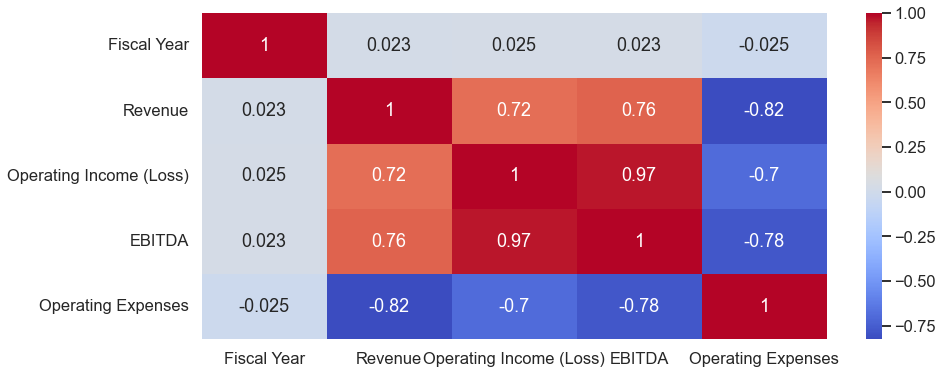

In [15]:
sns.set_theme(style="whitegrid")
sns.set_context('talk',font_scale=1)

fig = plt.figure(figsize=(14,6))

sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

plt.show()

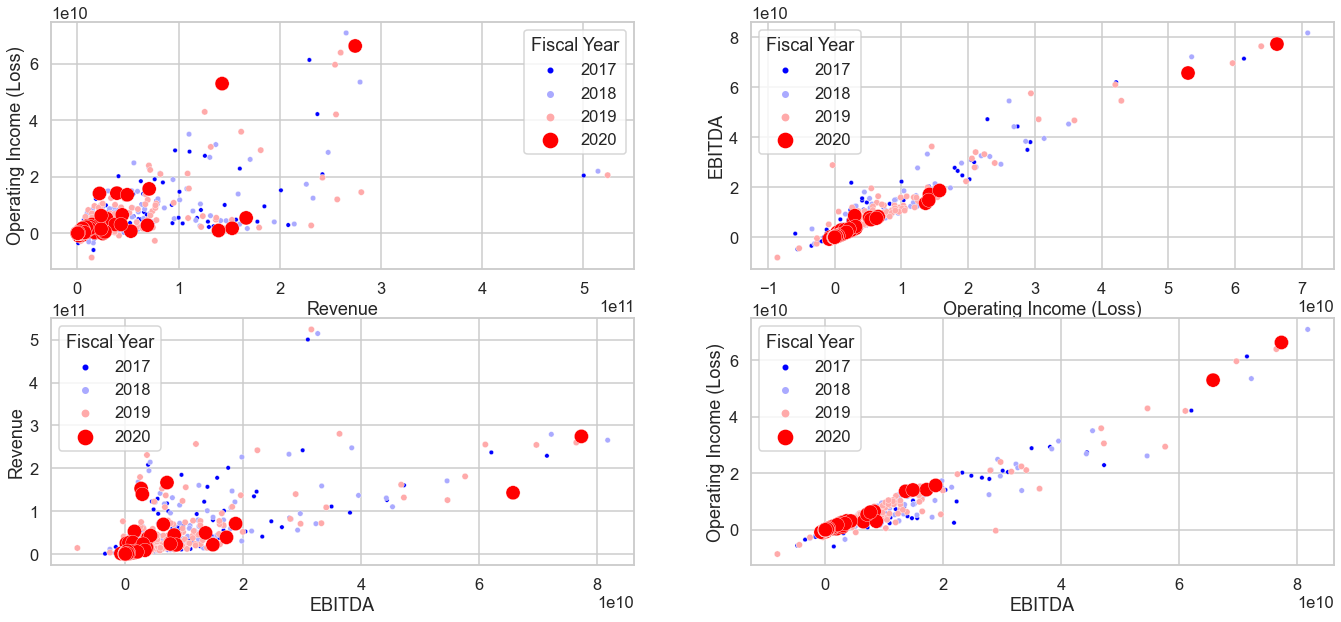

In [16]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(23,10))

sns.scatterplot(x = data['Revenue'], y = data['Operating Income (Loss)'], hue = data['Fiscal Year'], 
               size = data['Fiscal Year'], sizes = [20,30,40,200], palette = 'bwr', ax=axs[0,0])

sns.scatterplot(x = data['Operating Income (Loss)'], y = data['EBITDA'], hue = data['Fiscal Year'], 
               size = data['Fiscal Year'], sizes = [20,30,40,200], palette = 'bwr', ax=axs[0,1])

sns.scatterplot(x = data['EBITDA'], y = data['Revenue'], hue = data['Fiscal Year'], 
               size = data['Fiscal Year'], sizes = [20,30,40,200], palette = 'bwr', ax=axs[1,0])

sns.scatterplot(x = data['EBITDA'], y = data['Operating Income (Loss)'], hue = data['Fiscal Year'], 
               size = data['Fiscal Year'], sizes = [20,30,40,200], palette = 'bwr', ax=axs[1,1])

plt.show()

In [17]:
"""ok, aici iar ceva interesant...gen uita-te la 2020 ca desi era pe pula lucrarea, is cele mai mari venituri"""

data.groupby('Fiscal Year').describe()['Revenue'][['mean', 'std', 'min', 'max']]

,mean,std,min,max
Fiscal Year,,,,
2017,"6,792,733,706","22,819,406,099",0,"500,343,000,000"
2018,"7,500,722,013","25,037,995,707","-390,291","514,405,000,000"
2019,"7,893,357,091","26,463,515,319",0,"523,964,000,000"
2020,"9,527,265,071","29,566,288,171",784,"274,515,000,000"


# <center>Economic sectors<center>

#### Sorting of sectors by revenue for all 4 years

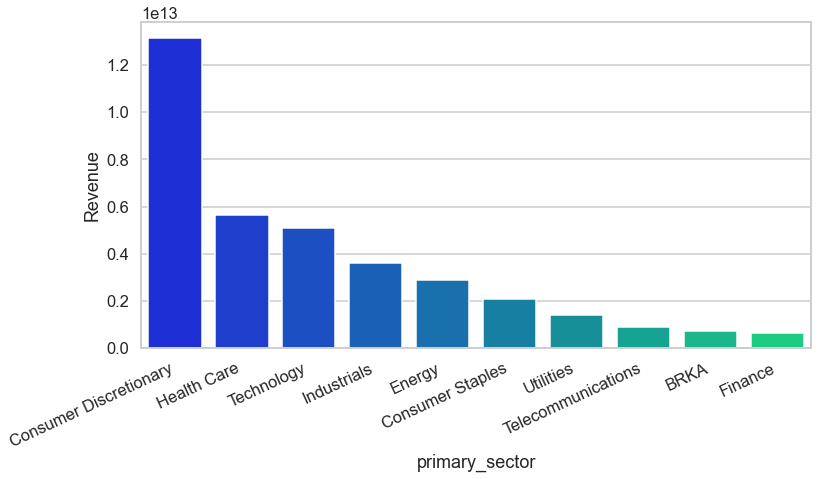

In [18]:
fig = plt.figure(figsize=(12,6))
p_sector = sns.barplot(x = data.groupby('primary_sector').sum().sort_values(by = 'Revenue', ascending = False)[:10].index, 
            y = 'Revenue', data = data.groupby('primary_sector').sum().sort_values(by = 'Revenue', ascending = False)[:10],
            palette = 'winter')
p_sector.set_xticklabels(p_sector.get_xticklabels(), rotation = 25, horizontalalignment = 'right')
plt.show()

In [19]:
data.groupby('primary_sector').sum().sort_values(by = 'Revenue', ascending = False)[:10][['Revenue', 
                                                                                            'Operating Income (Loss)',
                                                                                           'EBITDA',
                                                                                           'Operating Expenses']]

,Revenue,Operating Income (Loss),EBITDA,Operating Expenses
primary_sector,,,,
Consumer Discretionary,"13,158,613,694,995","1,259,481,550,480","1,937,739,781,927","-3,226,543,007,411"
Health Care,"5,656,085,713,011","583,564,779,368","757,119,162,149","-1,281,809,999,329"
Technology,"5,070,775,633,704","960,742,948,629","1,283,441,895,459","-1,320,074,487,743"
Industrials,"3,611,350,389,281","471,543,894,304","628,670,997,812","-554,381,774,813"
Energy,"2,898,340,784,512","292,331,380,165","569,800,569,895","-556,268,838,600"
Consumer Staples,"2,077,377,216,840","188,705,986,994","244,265,208,741","-437,094,871,785"
Utilities,"1,398,851,907,224","246,912,993,044","429,117,612,033","-514,029,754,467"
Telecommunications,"906,535,425,046","169,160,187,750","270,904,901,324","-348,127,676,018"
BRKA,"744,590,000,000","109,170,000,000","138,201,000,000","-55,741,000,000"


#### Sorting economic sectors by revenue for each year

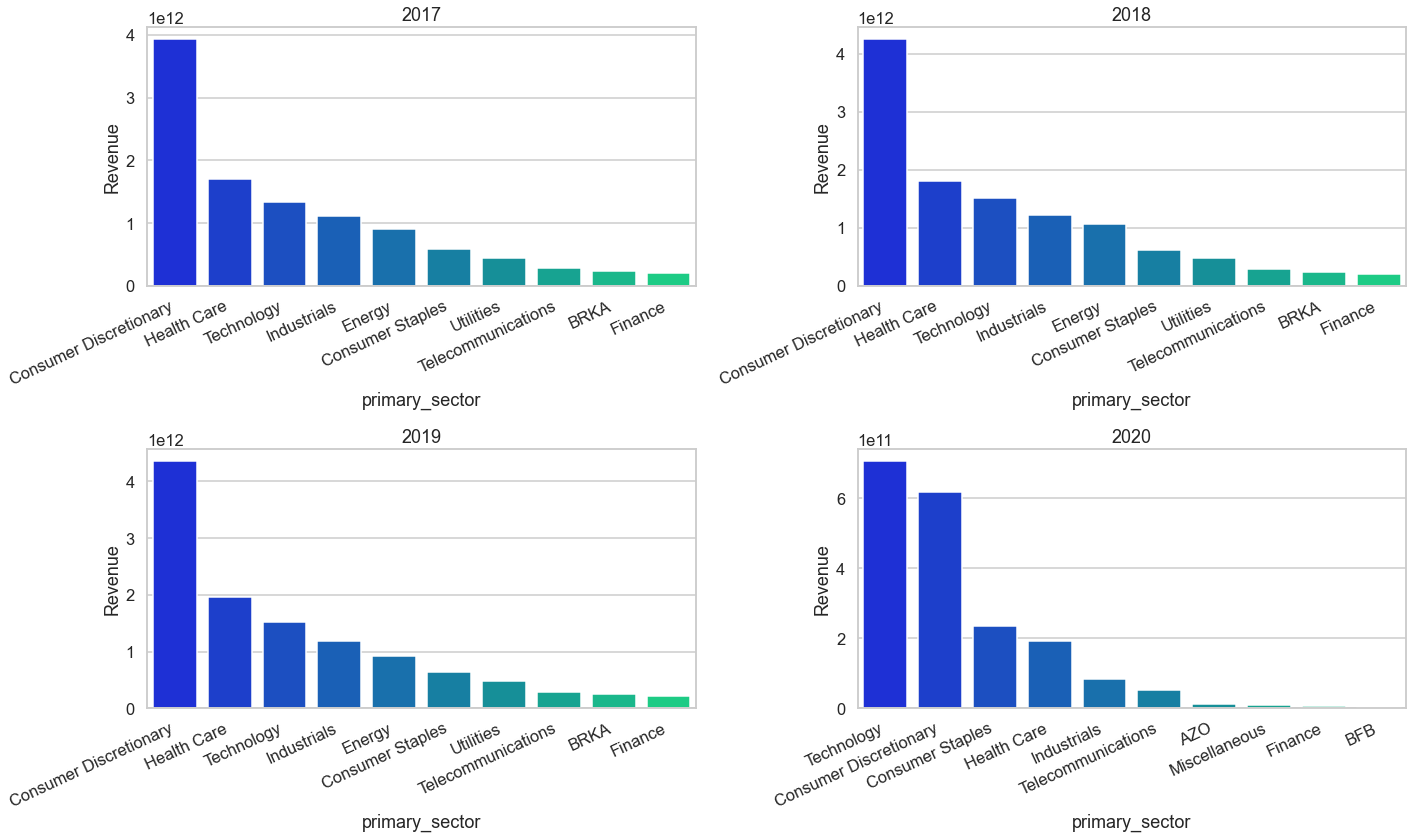

In [20]:
data_2017 = data[data['Fiscal Year'] == 2017]
data_2018 = data[data['Fiscal Year'] == 2018]
data_2019 = data[data['Fiscal Year'] == 2019]
data_2020 = data[data['Fiscal Year'] == 2020]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

sns.barplot(x=data_2017.groupby('primary_sector').sum().sort_values(by='Revenue', ascending=False)[:10].index,
            y='Revenue', data=data_2017.groupby('primary_sector').sum().sort_values(by='Revenue', ascending=False)[:10],
            palette='winter', ax=axes[0, 0])
axes[0, 0].set_title('2017')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=25, horizontalalignment='right')

sns.barplot(x=data_2018.groupby('primary_sector').sum().sort_values(by='Revenue', ascending=False)[:10].index,
            y='Revenue', data=data_2018.groupby('primary_sector').sum().sort_values(by='Revenue', ascending=False)[:10],
            palette='winter', ax=axes[0, 1])
axes[0, 1].set_title('2018')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=25, horizontalalignment='right')

sns.barplot(x=data_2019.groupby('primary_sector').sum().sort_values(by='Revenue', ascending=False)[:10].index,
            y='Revenue', data=data_2019.groupby('primary_sector').sum().sort_values(by='Revenue', ascending=False)[:10],
            palette='winter', ax=axes[1, 0])
axes[1, 0].set_title('2019')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=25, horizontalalignment='right')

sns.barplot(x=data_2020.groupby('primary_sector').sum().sort_values(by='Revenue', ascending=False)[:10].index,
            y='Revenue', data=data_2020.groupby('primary_sector').sum().sort_values(by='Revenue', ascending=False)[:10],
            palette='winter', ax=axes[1, 1])
axes[1, 1].set_title('2020')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=25, horizontalalignment='right')

plt.tight_layout()
plt.show()

#### Visualizing sectors evolution during the 4 years

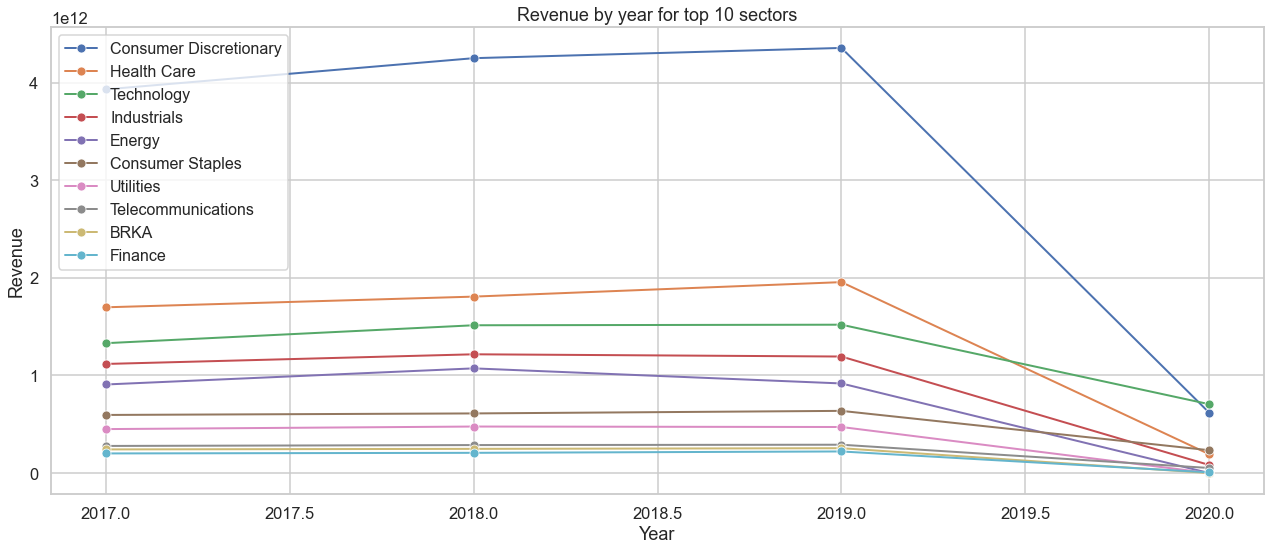

In [21]:
fig, ax = plt.subplots(figsize=(18, 8))

years = sorted(data['Fiscal Year'].unique())

top_industries = data.groupby('primary_sector')['Revenue'].sum().nlargest(10).index

for industry in top_industries:
    industry_data = data[data['primary_sector'] == industry]
    revenue_by_year = industry_data.groupby('Fiscal Year')['Revenue'].sum()

    revenue_by_year = revenue_by_year.reindex(years, fill_value=0)
    
    sns.lineplot(x=years, y=revenue_by_year, marker='o', label=industry, linewidth=2)

ax.set_xlabel('Year')
ax.set_ylabel('Revenue')
ax.set_title('Revenue by year for top 10 sectors')
ax.legend(loc='upper left', prop={'size': 16})

plt.tight_layout()
plt.show()

#### Taking a closer look at the year 2020

In [22]:
data[data['Fiscal Year'] == 2020].groupby('primary_sector').sum().\
        sort_values(by = 'Revenue', ascending = False)[:10][['Revenue', 'Operating Income (Loss)',
                                                                                           'EBITDA',
                                                                                           'Operating Expenses']]

,Revenue,Operating Income (Loss),EBITDA,Operating Expenses
primary_sector,,,,
Technology,"705,514,249,077","163,526,519,448","205,719,494,401","-153,887,905,552"
Consumer Discretionary,"619,052,676,080","56,864,688,587","75,121,692,048","-147,056,248,981"
Consumer Staples,"233,966,887,198","11,241,982,952","16,299,016,416","-38,926,812,310"
Health Care,"193,251,620,158","7,964,802,531","12,023,125,481","-22,966,053,410"
Industrials,"82,554,479,465","11,771,333,758","15,169,578,005","-20,218,890,880"
Telecommunications,"51,893,308,000","13,539,435,000","13,595,636,000","-19,034,760,000"
AZO,"12,631,967,000","2,417,679,000","2,815,145,000","-4,353,074,000"
Miscellaneous,"9,175,296,000","395,467,000","646,641,000","-1,749,217,000"
Finance,"6,995,504,000","478,967,000","539,747,000","-408,781,000"


#### Checking for the revenue difference between 2019 and 2020

In [23]:
y2020 = data[data['Fiscal Year'] == 2020].groupby('primary_sector').sum().\
        sort_values(by = 'Revenue', ascending = False)[:10][['Revenue']].rename(columns = {'Revenue': 'Revenue 2020'})
y2019 = data[data['Fiscal Year'] == 2019].groupby('primary_sector').sum().\
        sort_values(by = 'Revenue', ascending = False)[:10][['Revenue']].rename(columns = {'Revenue': 'Revenue 2019'})

merged = pd.concat([y2019, y2020], axis=1)

merged = merged.dropna()

merged['Difference'] = merged['Revenue 2019'] - merged['Revenue 2020']

merged

,Revenue 2019,Revenue 2020,Difference
primary_sector,,,
Consumer Discretionary,"4,356,250,986,796","619,052,676,080","3,737,198,310,716"
Health Care,"1,956,434,917,126","193,251,620,158","1,763,183,296,968"
Technology,"1,520,134,939,278","705,514,249,077","814,620,690,201"
Industrials,"1,193,961,891,938","82,554,479,465","1,111,407,412,473"
Consumer Staples,"637,156,968,936","233,966,887,198","403,190,081,738"
Telecommunications,"290,251,700,657","51,893,308,000","238,358,392,657"
Finance,"221,205,049,241","6,995,504,000","214,209,545,241"


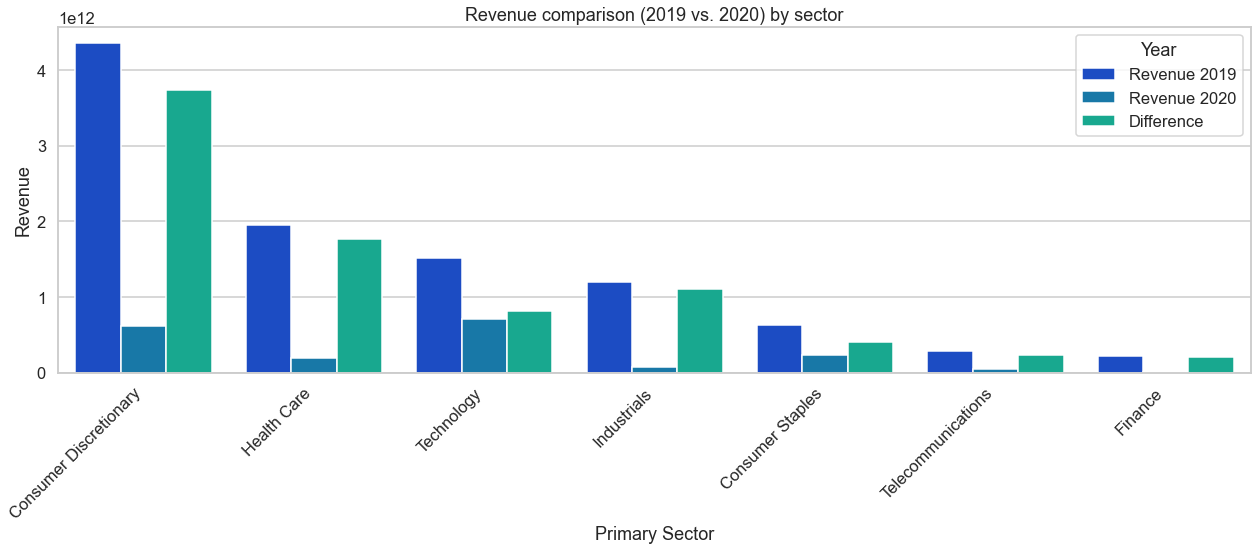

In [24]:
merged.reset_index(inplace=True)

melted = pd.melt(merged, id_vars='primary_sector', var_name='Year', value_name='Revenue')

plt.figure(figsize=(18, 8))
sns.barplot(x='primary_sector', y='Revenue', hue='Year', data=melted, palette = 'winter')
plt.xlabel('Primary Sector')
plt.ylabel('Revenue')
plt.title('Revenue comparison (2019 vs. 2020) by sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Taking a closer look at revenue distributuin (2019 and 2020)
#### Checking operating income for 2019 and 2020

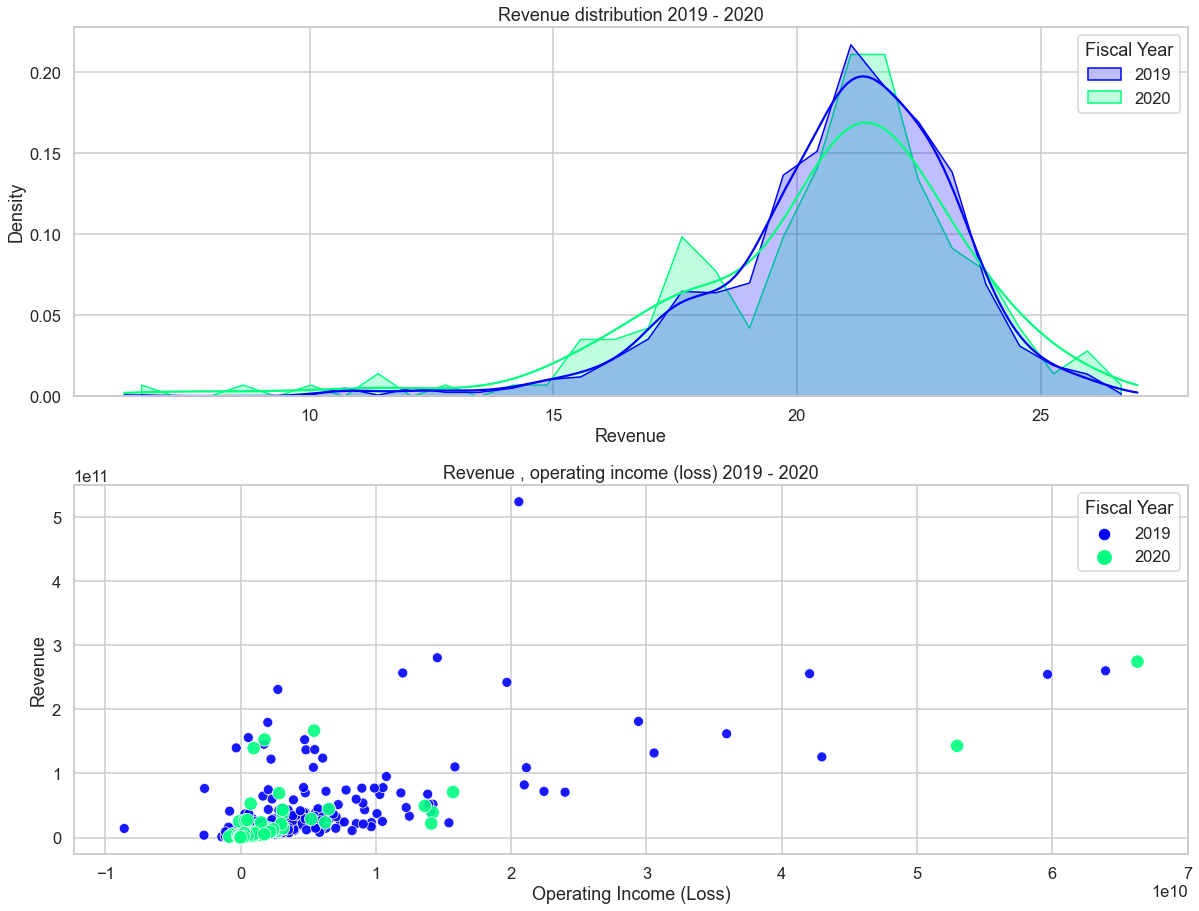

In [25]:
hues = [2019, 2020]

filt = data[data['Fiscal Year'].isin(hues)]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(17, 13))

rd = sns.histplot(data = filt, x = np.log(filt['Revenue']), kde=True, bins=30, hue = 'Fiscal Year', element="poly",
            stat="density", common_norm=False, palette="winter", ax = axes[0])
rd.set_title("Revenue distribution 2019 - 2020")

sp = sns.scatterplot(x = 'Operating Income (Loss)', y = 'Revenue', data = filt, 
                     size = 'Fiscal Year', hue = 'Fiscal Year', palette='winter', 
                sizes = (100, 180), alpha = 0.9, ax = axes[1])

sp.set_title("Revenue , operating income (loss) 2019 - 2020")

plt.tight_layout()

plt.show()

#### Checking for the number of businesses in each sector

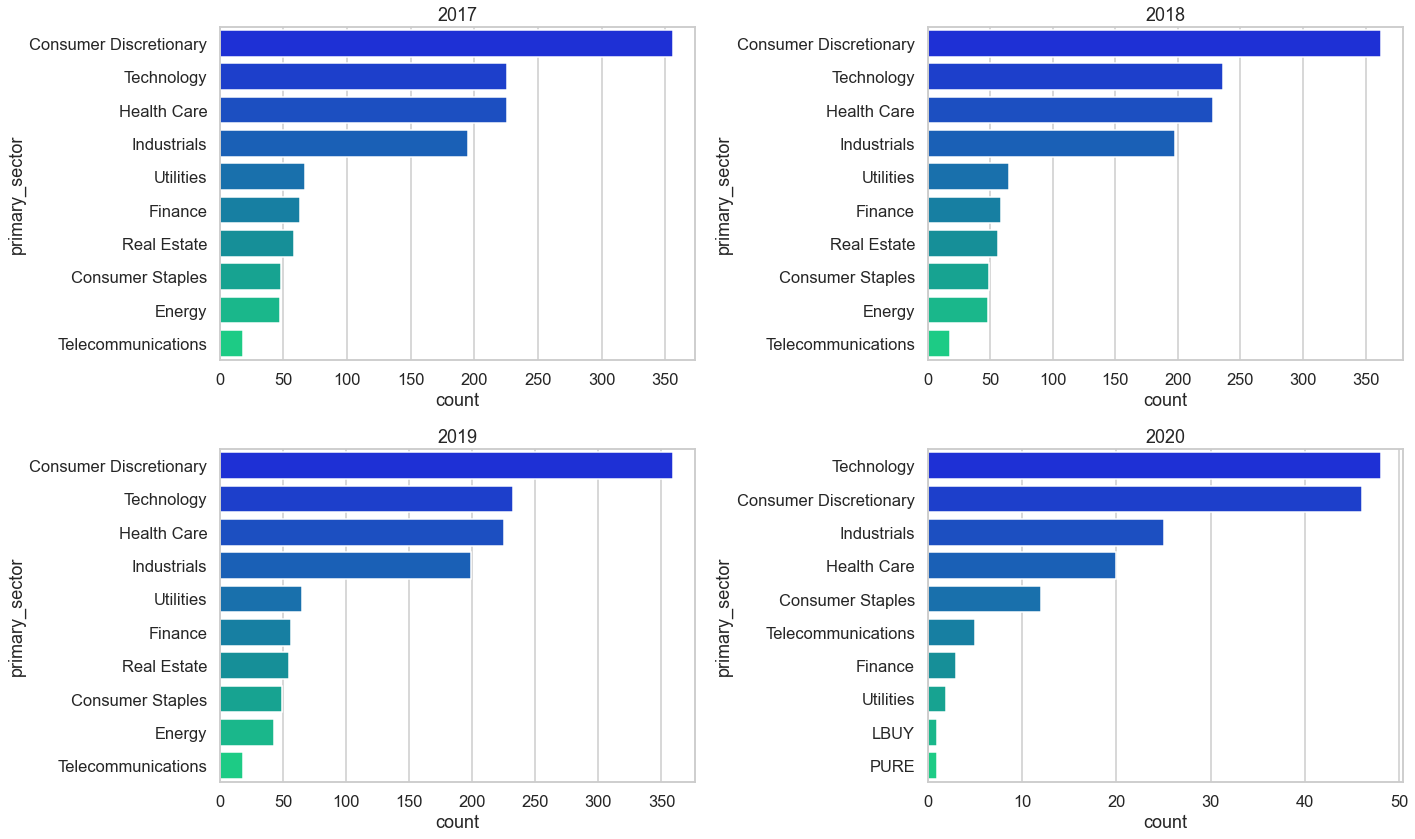

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

sns.countplot(y = 'primary_sector', data = data_2017, order=data_2017.primary_sector.value_counts().iloc[:10].index,
                      palette = "winter", ax = axes[0,0])
axes[0, 0].set_title('2017')

sns.countplot(y = 'primary_sector', data = data_2018, order=data_2018.primary_sector.value_counts().iloc[:10].index,
                      palette = "winter", ax = axes[0,1])
axes[0, 1].set_title('2018')

sns.countplot(y = 'primary_sector', data = data_2019, order=data_2019.primary_sector.value_counts().iloc[:10].index,
                      palette = "winter", ax = axes[1,0])
axes[1, 0].set_title('2019')

sns.countplot(y = 'primary_sector', data = data_2020, order=data_2020.primary_sector.value_counts().iloc[:10].index,
                      palette = "winter", ax = axes[1,1])
axes[1, 1].set_title('2020')

plt.tight_layout()
plt.show()

# 2020, iar...industrial pe primul loc la numarul de afaceri, wtf..si altele..comenteaza

#### Checking for the difference in number of organizations in each sector (2019 and 2020)

In [27]:
yr2020 = data[data['Fiscal Year'] == 2020].\
    groupby('primary_sector').nunique().sort_values(by = 'organization', ascending = False)[:10][['organization']].\
    rename(columns = {'organization': 'organizations 2020'})
yr2019 = data[data['Fiscal Year'] == 2019].\
    groupby('primary_sector').nunique().sort_values(by = 'organization', ascending = False)[:10][['organization']].\
    rename(columns = {'organization': 'organizations 2019'})

merged2 = pd.concat([yr2019, yr2020], axis=1)

merged2 = merged2.dropna()

merged2['Difference'] = merged2['organizations 2019'] - merged2['organizations 2020']

merged2

,organizations 2019,organizations 2020,Difference
primary_sector,,,
Consumer Discretionary,359,46,313
Technology,232,48,184
Health Care,225,20,205
Industrials,199,25,174
Utilities,65,2,63
Finance,56,3,53
Consumer Staples,49,12,37
Telecommunications,18,5,13


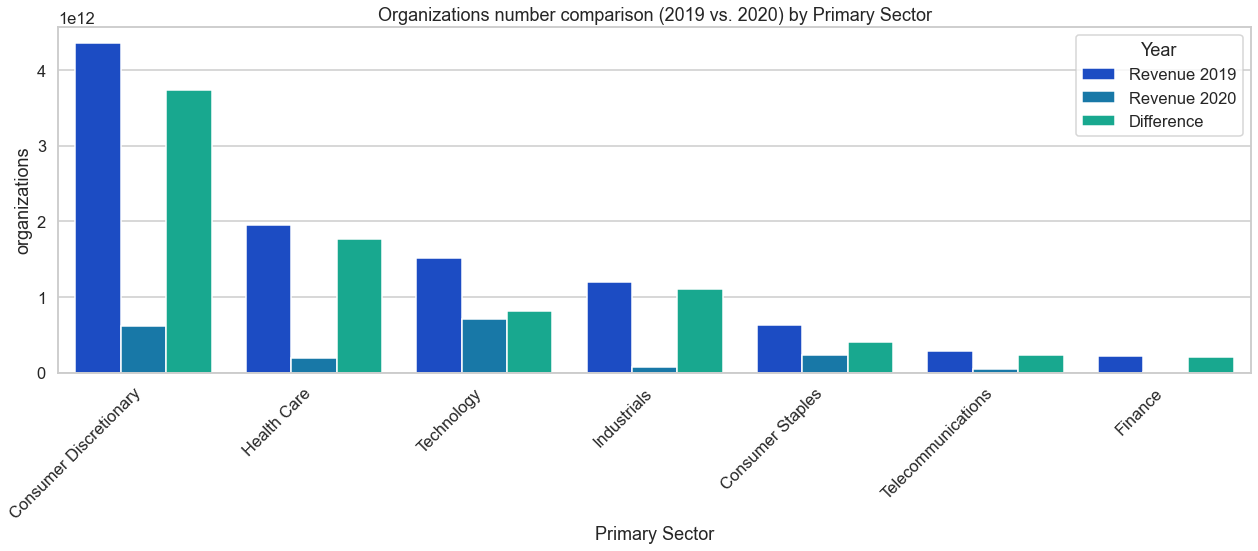

In [28]:
merged2.reset_index(inplace=True)

melted2 = pd.melt(merged2, id_vars='primary_sector', var_name='Year', value_name='Revenue')

plt.figure(figsize=(18, 8))
sns.barplot(x='primary_sector', y='Revenue', hue='Year', data=melted, palette = 'winter')
plt.xlabel('Primary Sector')
plt.ylabel('organizations')
plt.title('Organizations number comparison (2019 vs. 2020) by Primary Sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# <center>Industries<center>

#### Sorting the idustries by revenue for all 4 years

In [29]:
data.groupby('primary_industry').sum().sort_values(by = 'Revenue', ascending = False)[:10][['Revenue', 
                                                                                            'Operating Income (Loss)',
                                                                                           'EBITDA',
                                                                                           'Operating Expenses']]

,Revenue,Operating Income (Loss),EBITDA,Operating Expenses
primary_industry,,,,
Department/Specialty Retail Stores,"2,767,173,737,000","129,307,216,000","185,437,192,000","-537,917,048,000"
Other Pharmaceuticals,"1,828,173,003,000","53,788,535,000","67,294,899,000","-106,485,946,000"
Telecommunications Equipment,"1,703,606,500,154","276,399,339,455","515,935,629,696","-749,043,183,698"
Integrated oil Companies,"1,390,842,400,000","75,656,600,000","179,392,600,000","-214,798,200,000"
Oil & Gas Production,"1,247,497,444,512","205,869,703,165","364,623,336,895","-317,984,454,600"
Computer Manufacturing,"1,211,487,062,000","274,587,476,000","320,967,353,000","-151,235,208,000"
Medical Specialities,"1,103,531,016,000","84,286,610,000","103,096,446,000","-200,757,531,000"
Biotechnology: Pharmaceutical Preparations,"1,004,764,806,836","251,986,769,576","336,205,725,277","-475,576,781,260"
Auto Manufacturing,"983,603,119,000","28,650,374,000","102,846,427,000","-76,078,934,000"


#### Sorting industries by revenue for each year

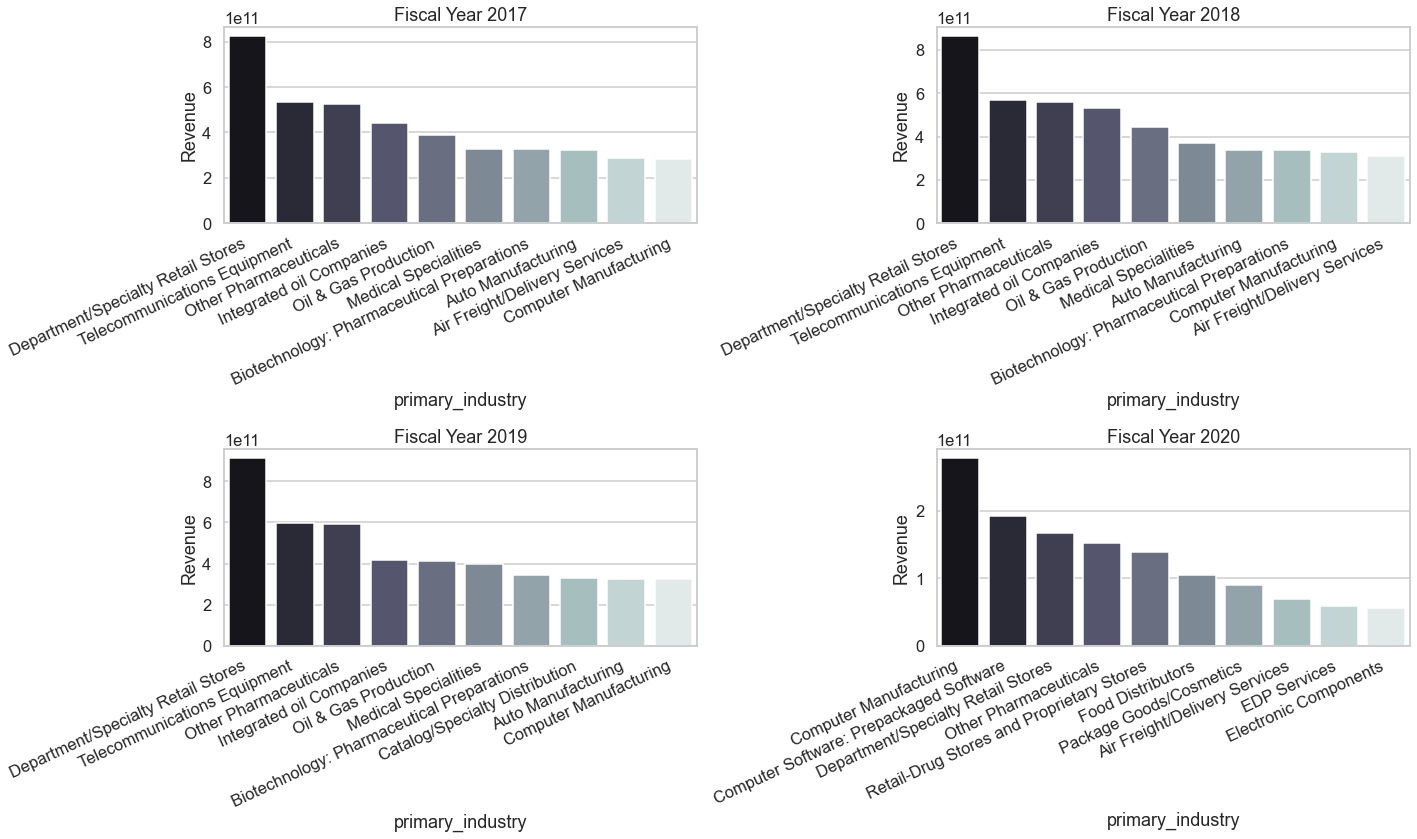

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

sns.barplot(x=data_2017.groupby('primary_industry').sum().sort_values(by='Revenue', ascending=False)[:10].index,
            y='Revenue', data=data_2017.groupby('primary_industry').sum().sort_values(by='Revenue', ascending=False)[:10],
            palette='bone', ax=axes[0, 0])
axes[0, 0].set_title('Fiscal Year 2017')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=25, horizontalalignment='right')

sns.barplot(x=data_2018.groupby('primary_industry').sum().sort_values(by='Revenue', ascending=False)[:10].index,
            y='Revenue', data=data_2018.groupby('primary_industry').sum().sort_values(by='Revenue', ascending=False)[:10],
            palette='bone', ax=axes[0, 1])
axes[0, 1].set_title('Fiscal Year 2018')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=25, horizontalalignment='right')

sns.barplot(x=data_2019.groupby('primary_industry').sum().sort_values(by='Revenue', ascending=False)[:10].index,
            y='Revenue', data=data_2019.groupby('primary_industry').sum().sort_values(by='Revenue', ascending=False)[:10],
            palette='bone', ax=axes[1, 0])
axes[1, 0].set_title('Fiscal Year 2019')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=25, horizontalalignment='right')

sns.barplot(x=data_2020.groupby('primary_industry').sum().sort_values(by='Revenue', ascending=False)[:10].index,
            y='Revenue', data=data_2020.groupby('primary_industry').sum().sort_values(by='Revenue', ascending=False)[:10],
            palette='bone', ax=axes[1, 1])
axes[1, 1].set_title('Fiscal Year 2020')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=25, horizontalalignment='right')

plt.tight_layout()
plt.show()

#### Visualizing industries evolution during the 4 years

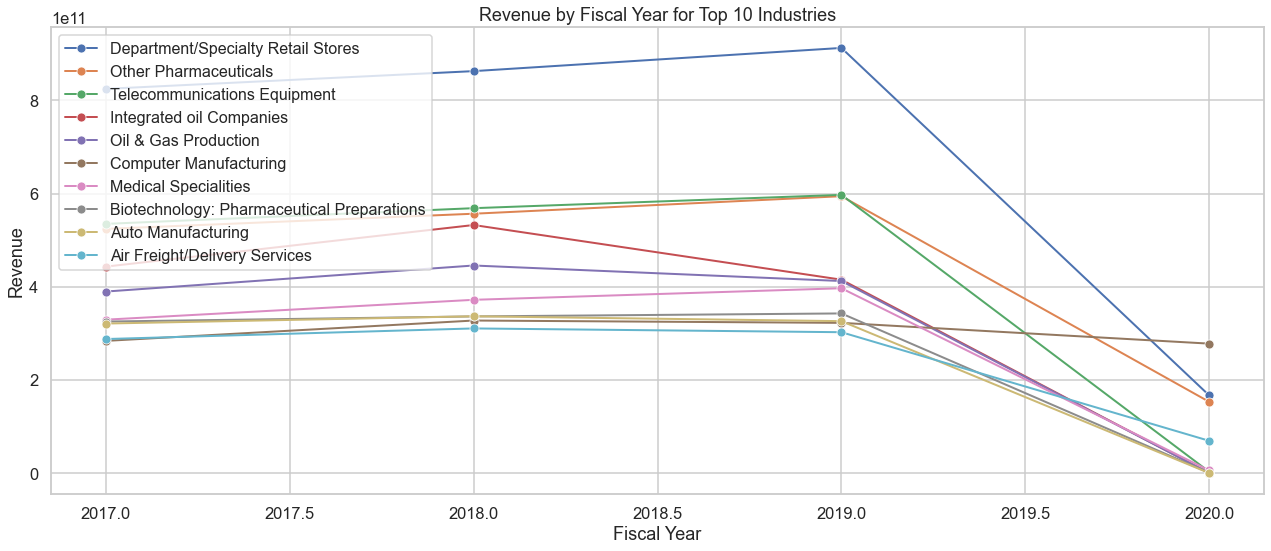

In [31]:
fig, ax = plt.subplots(figsize=(18, 8))

years = sorted(data['Fiscal Year'].unique())

top_industries = data.groupby('primary_industry')['Revenue'].sum().nlargest(10).index

for industry in top_industries:
    industry_data = data[data['primary_industry'] == industry]
    revenue_by_year = industry_data.groupby('Fiscal Year')['Revenue'].sum()

    revenue_by_year = revenue_by_year.reindex(years, fill_value=0)
    
    sns.lineplot(x=years, y=revenue_by_year, marker='o', label=industry, linewidth=2)

ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Revenue')
ax.set_title('Revenue by Fiscal Year for Top 10 Industries')
ax.legend(loc='upper left', prop={'size': 16})

plt.tight_layout()
plt.show()

#### Checking for the difference in number of organizations in each industry (2019 and 2020)

In [32]:
yy2019 = data_2019[['organization', 'primary_industry']].\
        groupby('primary_industry').nunique().sort_values(by='organization', ascending=False)[:15].\
        rename(columns = {'organization': 'organizations 2019'})

yy2020 = data_2020[['organization', 'primary_industry']].\
        groupby('primary_industry').nunique().sort_values(by='organization', ascending=False)[:15].\
        rename(columns = {'organization': 'organizations 2020'})

In [39]:
merged3 = pd.concat([yy2019, yy2020], axis=1)

merged3 = merged3.dropna()

merged3['Difference'] = merged3['organizations 2019'] - merged3['organizations 2020']

merged3

,organizations 2019,organizations 2020,Difference
primary_industry,,,
EDP Services,68,8,60
Industrial Machinery/Components,63,15,48
Computer Software: Prepackaged Software,49,8,41
Medical/Dental Instruments,35,4,31
Semiconductors,35,5,30
Telecommunications Equipment,34,6,28
Business Services,21,5,16
Restaurants,20,4,16


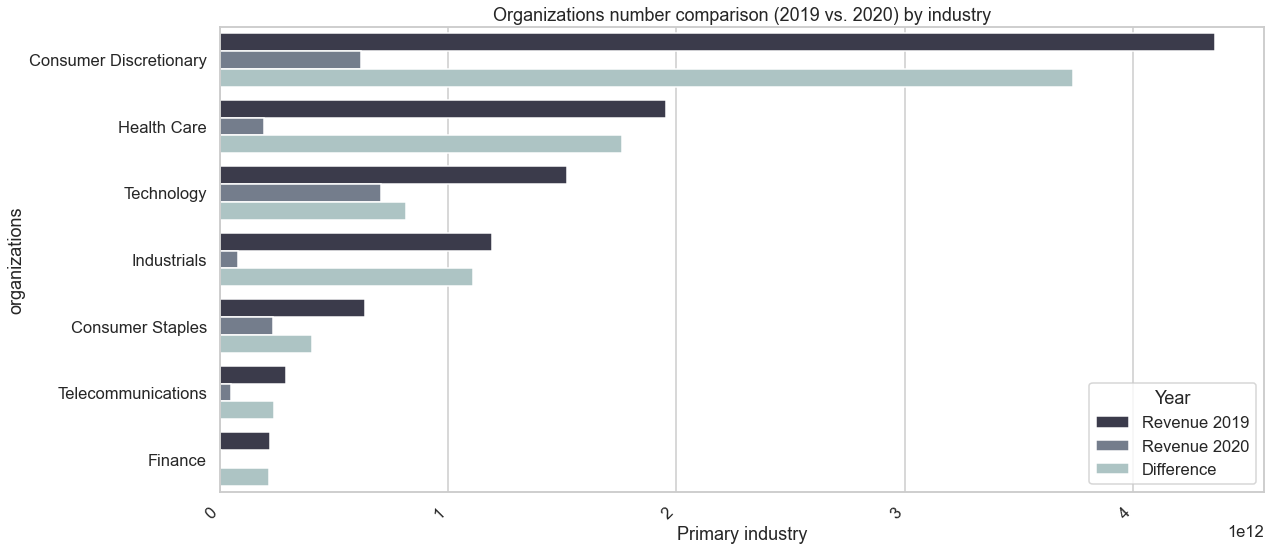

In [40]:
merged3.reset_index(inplace=True)

melted3 = pd.melt(merged3, id_vars='primary_industry', var_name='Year', value_name='Revenue')

plt.figure(figsize=(18, 8))
sns.barplot(y='primary_sector', x='Revenue', hue='Year', data=melted, palette = 'bone')
plt.xlabel('Primary industry')
plt.ylabel('organizations')
plt.title('Organizations number comparison (2019 vs. 2020) by industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Closer look at tech industris & companies in 2020

#### Tech industries from 2020

In [35]:
data_2020.groupby('primary_sector').get_group('Technology')['primary_industry'].value_counts()

Computer Software: Prepackaged Software                           8
EDP Services                                                      8
Electronic Components                                             6
Industrial Machinery/Components                                   6
Electrical Products                                               5
Semiconductors                                                    5
Computer peripheral equipment                                     3
Retail: Computer Software & Peripheral Equipment                  2
Computer Manufacturing                                            2
Security Systems Services                                         1
Internet and Information Services                                 1
Radio And Television Broadcasting And Communications Equipment    1
Name: primary_industry, dtype: int64

#### Tech companies from 2020

In [36]:
data_2020.groupby('primary_sector').get_group('Technology')['organization'].unique()

array(['SigmaTron International Inc. Common Stock',
       'American Software Inc. Class A Common Stock',
       'Methode Electronics Inc. Common Stock',
       'NetApp Inc. Common Stock', 'Elastic N.V. Ordinary Shares',
       'TSR Inc. Common Stock', 'Oracle Corporation Common Stock',
       'Alpha and Omega Semiconductor Limited Common Shares',
       'Synaptics Incorporated Common Stock $0.001 Par Value',
       'Espey Mfg. & Electronics Corp. Common Stock',
       'Jack Henry & Associates Inc. Common Stock',
       'LightPath Technologies Inc. Class A Common Stock',
       'Kimball Electronics Inc. Common Stock',
       'eGain Corporation Common Stock',
       'Super Micro Computer Inc. Common Stock',
       'Trio-Tech International Common Stock', 'Avnet Inc. Common Stock',
       'NAPCO Security Technologies Inc. Common Stock',
       'Lam Research Corporation Common Stock',
       'KLA Corporation Common Stock',
       'OSI Systems Inc. Common Stock (DE)',
       'Western Digita

# <center>Conclusions<center>

#### Technology sector

* Before 2020, the technology sector was always ranked third globally. But when the pandemic started, technology became the most important sector worldwide.
* The sudden shift to remote work made tools very popular because they helped people collaborate virtually. These tools became essential for businesses during lockdowns and social distancing.
* As more people stayed home, online shopping and delivery services saw a huge increase in demand. Technology played a vital role in making sure businesses could keep running despite the challenges.
* The pandemic also pushed many industries to go digital. Businesses realized the importance of having a strong online presence and using technology for remote work, connecting with customers, and analyzing data.
* Even though technology adoption increased, there were also problems in the supply chain. Manufacturing and logistics disruptions made it hard to get hardware components, slowing down some technological advancements.

#### Consumer Discretionary sector

* Before 2020, the Consumer Discretionary sector was consistently in the first place globally. However, in 2020, it fell to the second place, being surpassed by the Technology sector in terms of revenue, importance and impact on a global scale.

* During 2020, the Consumer Discretionary sector faced challenges due to the COVID-19 pandemic. With lockdowns and social distancing measures in place, people's spending behavior changed, and many non-essential businesses were forced to temporarily close. As a result, the demand for products and services in this sector declined compared to previous years.

* The pandemic had a significant impact on consumer behavior. As people stayed at home more, there was a decline in discretionary spending on items maybe like travel, entertainment, luxury goods, pr dining out. Many companies in this sector experienced decreased revenue and had to adapt their strategies to survive during the uncertain times.

#### Healthcare sector

* In the years before 2020, the Healthcare sector held the second-place position globally. However, in a surprising turn of events, in 2020, it fell to the fourth place, despite the fact that the world was fighting with a pandemic, and the importance of healthcare was more evident than ever.

* The COVID-19 pandemic brought the healthcare sector into the spotlight as it played a critical role in combating the virus and providing essential medical services. Healthcare professionals, hospitals, and medical companies worked tirelessly to treat patients and develop vaccines and treatments. Despite these significant contributions during the pandemic, the sector's overall ranking dropped in comparison to previous years.

* One possible explanation for this unexpected shift could be related to the broader impact of the pandemic on the global economy. The healthcare sector faced both opportunities and challenges during the health crisis. While there was an increased demand for healthcare services, equipment, and pharmaceuticals, there were also disruptions in other areas of the sector.

* As resources and attention were diverted to fight the pandemic, other aspects of healthcare may have experienced slower growth or faced operational challenges. Some elective procedures and non-essential medical services were postponed or canceled to prioritize COVID-19 care. Additionally, supply chain disruptions and workforce constraints affected various healthcare operations.

#### Consumer Staples sector

* In the years before 2020, the Consumer Staples sector held the sixth-place position globally. However, in 2020, it experienced a significant rise in importance, climbing to the third place.

* The COVID-19 pandemic had a profound impact on consumer behavior and priorities. With widespread lockdowns and uncertainties, people's focus shifted to essential goods and products that were crucial for daily living. As a result, the demand for Consumer Staples, which includes items like food, beverages, household essentials, and personal care products, saw a notable surge.

* During the pandemic, the Consumer Staples sector became one of the most critical sectors in ensuring the availability of essential goods and maintaining supply chains. Grocery stores, online retailers, and other businesses within this sector played a vital role in meeting the basic needs of people around the world during the health crisis.

* The rise of the Consumer Staples sector to the third place can be attributed to its resilience and significance in providing essential products amid the challenging circumstances of the pandemic. As consumers focused on stocking up on necessities and maintaining safety and hygiene, the sector experienced increased demand and growth.

* Moreover, the shift in consumer spending patterns also influenced the sector's rise in the global rankings. With reduced spending on non-essential items and experiences, there was a higher proportion of spending directed towards essential goods, bolstering the Consumer Staples sector's prominence.

#### Energy sector

* Before the pandemic, the Energy sector held the fifth-place position globally. However, in 2020, it experienced a massive fall in importance and ranking.

* The COVID-19 pandemic had a severe impact on the energy industry. With widespread lockdowns, travel restrictions, and reduced economic activities, there was a significant decrease in energy consumption worldwide. Industries, businesses, and transportation sectors were hit hard by the pandemic's effects, leading to reduced demand for oil, gas, and other energy sources.

* As a result of the decreased demand, energy prices plummeted during 2020. The oversupply of oil and gas further exacerbated the situation, leading to a steep decline in revenues for energy companies and impacting their profitability.

* The Energy sector faced multiple challenges, including disruptions in supply chains, delayed projects, and reduced investments. Many companies in the sector had to cut costs, lay off workers, and even shut down operations to cope with the drastic drop in demand and falling prices.

* The fall of the Energy sector's ranking can be attributed to its struggles during the pandemic. The sharp decline in energy consumption and prices resulted in its diminished importance on a global scale. The reduced economic activities and travel restrictions severely impacted energy-intensive industries, which contributed to the sector's decline.

* While other sectors like Technology and Consumer Staples saw rises in importance due to changing consumer behavior and increased demand for digital services and essential goods, the Energy sector faced a significant downturn due to its heavy reliance on economic activities and global mobility.

#### Computer Manufacturing & Computer Software industries

* Before 2020, the Computer Manufacturing industry and the Computer Software industries were ranked in the 10th and 11th places, respectively, globally. However, in 2020, both sectors experienced a remarkable rise, becoming the first and second places in global rankings.

* The COVID-19 pandemic significantly accelerated the adoption of technology, as businesses and individuals relied heavily on digital solutions and remote work. This sudden surge in demand for computers, laptops, and related hardware led to a massive boost in the Computer Manufacturing industry. People needed devices to work, study, and stay connected while adhering to lockdowns and social distancing measures.

* Additionally, the shift towards remote work and online services fueled the demand for Computer Software. Businesses required software for communication, collaboration, project management, and cybersecurity, while consumers sought entertainment and productivity software to adapt to the new normal.

* The rise of both sectors to the first and second places can be attributed to their crucial role in supporting the global economy during the pandemic. Technology became an essential enabler for remote work, virtual meetings, online shopping, and digital entertainment.

* Moreover, the pandemic's impact on other industries, such as travel, hospitality, and traditional retail, resulted in reduced rankings for those industries, further elevating the significance of the Computer Manufacturing and Computer Software industries in the global economy.

#### Telecommunications equipment industry

* Before 2020, the Telecommunications Equipment industry held a significant position, ranking second place globally. However, in 2020, the industry experienced a massive fall and dropped out of the top 10 industries globally.

* The COVID-19 pandemic had a profound impact on the Telecommunications Equipment industry. While the demand for telecommunications services surged due to increased remote work, virtual meetings, and online communication, the same was not true for telecommunications equipment.

* With many businesses facing economic uncertainties and reduced investments, there was a slowdown in infrastructure upgrades and new equipment purchases. The pandemic-induced disruptions in supply chains and manufacturing further contributed to the industry's decline.

* The shift in consumer behavior during the pandemic also played a role. With the focus on essential goods and services, there was reduced spending on non-essential items, including telecommunications equipment like smartphones, routers, and other devices.